CSCE 4143: Data Mining\
Xintao Wu, Ph.D.\
Practice Project\
Group 7: Levi Crider, Caleb Holmes, Spencer Smith, and Ethan Weems\
Step 2: Clustering

Import Packages

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Import Data from Adult Data File

In [3]:
labels = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "actual-value"]
numeric_labels = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
df = pd.read_table("./adult/adult.data", names=labels, delimiter=",")

Clean Data\
-Remove unknown values\
-Split numerical attributes into binary attributes

In [4]:
df = df.astype(str)

# using list comprehension
curr_labels = [i for i in labels if i not in numeric_labels]

substring = '\?' # character indicating null value
for label in curr_labels:
   filter = df[label].str.contains(substring) 
   df = df[~filter]

df = df.reset_index(drop=True)

df[numeric_labels] = df[numeric_labels].astype(float)

mean_values = df[numeric_labels].mean()

for num_label, threshold in mean_values.items():
    df[num_label] = df[num_label].apply(lambda x: 1 if x >= threshold else 0)

df[numeric_labels]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,1,0,1,1,0,0
1,1,0,1,0,0,0
2,0,1,0,0,0,0
3,1,1,0,0,0,0
4,0,1,1,0,0,0
...,...,...,...,...,...,...
30157,0,1,1,0,0,0
30158,1,0,0,0,0,0
30159,1,0,0,0,0,0
30160,0,1,0,0,0,0


Perform One-Hot Encoding and Split Data

In [5]:
X = df[curr_labels[0 : len(curr_labels) - 1]]
y = df["actual-value"].values

one_hot = OneHotEncoder()
label_encoder = LabelEncoder()
x_encode = one_hot.fit_transform(X).toarray()
y_encode = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(x_encode, y_encode, test_size=0.2)


Build K-means Clustering Algorithm 

In [6]:
def createKMeansCluster(num):
    # create and train model
    kmeans = KMeans(n_clusters=num, random_state=42)
    kmeans.fit(X_train)
    
    centroids = kmeans.cluster_centers_
    
    return centroids

3 Clusters

In [7]:
createKMeansCluster(3)

/home/emweems/anaconda3/envs/meeg591v/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 3.09502494e-02,  8.65839621e-02,  7.80662489e-01,
         1.27893593e-02,  4.05422688e-02,  4.82158844e-02,
         2.55787185e-04,  2.49392505e-02,  3.90075457e-02,
         1.25335721e-02,  4.60416933e-03,  7.28993477e-03,
         1.36846144e-02,  1.20219977e-02,  4.02864816e-02,
         4.64253741e-02,  1.58588055e-01,  7.54572196e-03,
         3.11932472e-01,  5.38432025e-02,  1.53472311e-03,
         8.44097711e-03,  2.57321908e-01,  2.56682440e-01,
         1.02314874e-03,  1.49251822e-01,  1.84166773e-02,
         4.44558128e-01,  5.87031590e-02,  7.13646246e-02,
         2.53740888e-01,  2.33103467e-18,  2.13582300e-02,
         1.18429467e-01,  6.90625400e-03,  1.58588055e-02,
         5.52500320e-02,  1.79306817e-01,  1.47077631e-02,
         1.55902289e-01,  7.41782837e-03,  1.26358869e-01,
         3.47870572e-02,  9.97570022e-03, -4.05231404e-15,
         3.70763525e-01,  3.88796521e-02,  2.02071876e-01,
         2.47346208e-01,  1.40938739e-01,  1.01035938e-0

5 Clusters

In [8]:
createKMeansCluster(5)

/home/emweems/anaconda3/envs/meeg591v/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 2.69058296e-02,  4.94875080e-02,  7.91159513e-01,
         2.22613709e-02,  7.28699552e-02,  3.69955157e-02,
         3.20307495e-04,  3.61947470e-02,  4.93273543e-02,
         2.00192184e-02,  5.60538117e-03,  1.18513773e-02,
         1.60153748e-02,  2.00192184e-02,  3.02690583e-02,
         3.45932095e-02,  1.51665599e-01,  6.56630365e-03,
         3.37283792e-01,  3.73158232e-02,  2.24215247e-03,
         1.23318386e-02,  2.28699552e-01,  2.09320948e-01,
         2.38524478e-18,  1.44138373e-03,  2.40230621e-02,
         7.00512492e-01,  4.59641256e-02,  1.87379885e-02,
         7.81550288e-02,  8.00768738e-04,  1.72005125e-01,
         8.71236387e-02,  4.82062780e-02,  9.68930173e-02,
         7.06278027e-02,  1.19955157e-01,  1.12107623e-03,
         9.92953235e-02,  2.49839846e-02,  1.09865471e-01,
         2.61050609e-02,  6.48622678e-02, -3.38618023e-15,
         5.30108905e-01,  5.66944266e-02,  3.15182575e-01,
         9.80140935e-02,  1.24900090e-16,  1.18513773e-0

10 Clusters

In [9]:
createKMeansCluster(10)

/home/emweems/anaconda3/envs/meeg591v/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 1.01908397e-01,  2.04198473e-01,  2.66453526e-15,
         1.70610687e-01,  3.94656489e-01,  1.27862595e-01,
         7.63358779e-04,  2.21374046e-02,  1.67938931e-02,
         8.01526718e-03,  2.29007634e-03,  6.87022901e-03,
         2.90076336e-02,  1.48854962e-02,  4.00763359e-02,
         5.03816794e-02, -5.55111512e-16,  4.00763359e-02,
         3.59160305e-01,  1.15648855e-01,  3.81679389e-04,
         6.52671756e-02,  2.29007634e-01,  3.81679389e-04,
         3.81679389e-04,  9.96564885e-01,  7.63358779e-04,
         8.32667268e-16,  1.14503817e-03,  7.63358779e-04,
         5.38167939e-02,  1.14503817e-03,  1.63740458e-01,
         1.80152672e-01,  1.04198473e-01,  1.06870229e-02,
         1.22137405e-02,  4.35114504e-02,  0.00000000e+00,
         1.76335878e-01,  7.25190840e-02,  9.69465649e-02,
         1.98473282e-02,  6.48854962e-02,  9.90076336e-01,
         7.63358779e-04,  8.01526718e-03,  1.14503817e-03,
        -2.63677968e-16, -9.02056208e-17,  1.03053435e-0

K-Nearest Neighbor Algorithm

In [10]:
def kNN_Wrapper(num):
    # use last 10 records from test data
    data = X_test[len(X_test) - 10: len(X_test)]
    
    knn = KNeighborsClassifier(n_neighbors=num)
    
    knn.fit(X_train, y_train)
    
    predictions = knn.predict(data)
    predictions
    
    accuracy = accuracy_score(y_test[len(y_test) - 10 : len(y_test)], predictions)
    print(f"Accuracy: {accuracy:.2f}")
    
    print(classification_report(y_test[len(y_test) - 10 : len(y_test)], predictions))

kNN 3

In [11]:
kNN_Wrapper(3)

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



kNN 5

In [12]:
kNN_Wrapper(5)

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



kNN 10

In [13]:
kNN_Wrapper(10)

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



<h1>Task #3:</h3>
Build SVM classifier and report the predicted accuracy of the test data.

In [21]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)


SVC()

In [31]:
# predict using testing data
svm_predictions = svm_model.predict(X_test)

Compare predictions to the true values

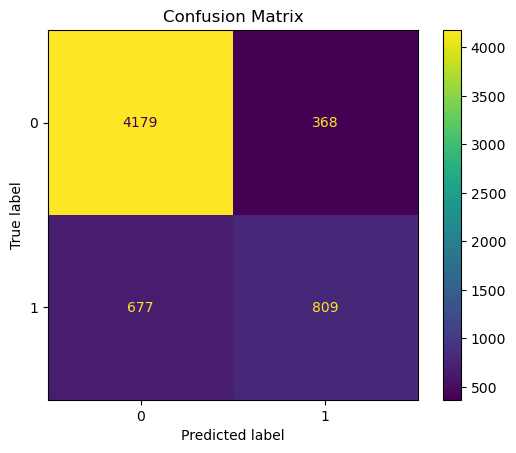

In [32]:
def plot_confusion_matrix(predictions, true):
    confMat = confusion_matrix(true, predictions)
    dispConfMat = ConfusionMatrixDisplay(confusion_matrix=confMat)
    dispConfMat.plot()
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(predictions=svm_predictions,true=y_test)

<h1>Task #4:</h3>
Build a neural network classifier and report the predicted accuracy of the test data.

In [33]:
from sklearn.neural_network import MLPClassifier

In [34]:
nn_model = MLPClassifier(random_state=77, max_iter=500)
nn_model.fit(X_train, y_train)

MLPClassifier(max_iter=500, random_state=77)

In [37]:
nn_predictions = nn_model.predict(X_test)

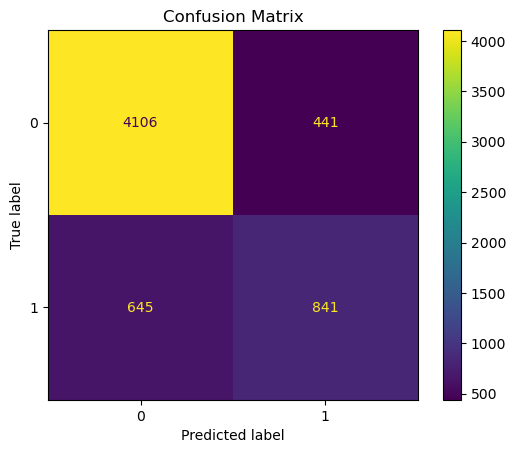

In [39]:
plot_confusion_matrix(predictions=nn_predictions,true=y_test)